In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy import linalg
import numpy as np

In [2]:
def lerp( a, b, t ):
    return (1 - t) * a + t * b

In [22]:
# define data here
n_samples = 10
# n_features=3 is maximum for plotting the data
n_features = 3 
centers = 3
cluster_std = 0.2

In [23]:
x, y = make_blobs( n_samples, n_features, centers=centers, cluster_std=cluster_std )
# order X by cluster groups
nx = []
ny = []
for c in range( centers ):
    for i in range( n_samples ):
        if y[i] == c:
            nx.append( x[i] )
            ny.append( y[i] )
x = np.array( nx )
y = np.array( ny )
x, y

(array([[  5.55051445,  -9.49258675,  -9.59686607],
        [  6.20091937,  -9.35497815,  -9.36757502],
        [  5.88192825,  -9.63189901,  -9.34438706],
        [  5.54736884,  -9.55263892,  -9.72845439],
        [-10.23911418,  -9.68685151,   1.76053274],
        [ -9.82561998,  -9.46872941,   1.72617797],
        [-10.13769735,  -9.26947046,   1.94897761],
        [  9.31339196,  -8.01511415,  -6.76423952],
        [  9.47357451,  -7.91118013,  -6.3815485 ],
        [  9.45843359,  -8.33042953,  -6.30051094]]),
 array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2]))

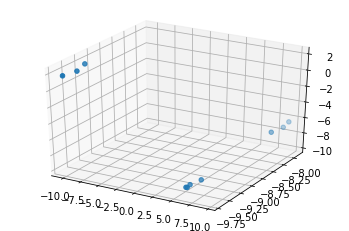

In [24]:
fig = plt.figure()
ax = fig.add_subplot( 111, projection='3d' )

x_vals = x[:, 0]
y_vals = x[:, 1]
z_vals = x[:, 2]
ax.scatter( x_vals, y_vals, z_vals )
plt.show()

In [25]:
df = pd.DataFrame( x )
smm = np.array( squareform( pdist( df ) ) )
smm

array([[ 0.        ,  0.7032333 ,  0.43930475,  0.14467772, 19.45097989,
        19.09548129, 19.48015084,  4.93618736,  5.31314541,  5.24293797],
       [ 0.7032333 ,  0.        ,  0.42305812,  0.7722901 , 19.85496475,
        19.49190238, 19.87516217,  4.27318112,  4.65952559,  4.58998702],
       [ 0.43930475,  0.42305812,  0.        ,  0.51548024, 19.57575726,
        19.21746877, 19.60356713,  4.58760262,  4.96378974,  4.87343771],
       [ 0.14467772,  0.7722901 ,  0.51548024,  0.        , 19.52505785,
        19.17144827, 19.55668437,  5.03323776,  5.41398716,  5.34237958],
       [19.45097989, 19.85496475, 19.57575726, 19.52505785,  0.        ,
         0.46875895,  0.46904561, 21.39548888, 21.40178943, 21.32636148],
       [19.09548129, 19.49190238, 19.21746877, 19.17144827,  0.46875895,
         0.        ,  0.43212971, 20.98813867, 20.99095272, 20.91884758],
       [19.48015084, 19.87516217, 19.60356713, 19.55668437,  0.46904561,
         0.43212971,  0.        , 21.35037325

In [26]:
w, v = np.linalg.eig( np.array( smm ) )
w, v

(array([102.83155144, -83.61349004, -15.92141828,  -0.93650944,
         -0.14046849,  -0.57420038,  -0.48116744,  -0.43193839,
         -0.36212809,  -0.3702309 ]),
 array([[-2.67117191e-01, -2.43522236e-01,  3.66155971e-01,
         -4.17976588e-01,  7.43759420e-01, -1.83783883e-02,
          5.36677744e-03,  3.41747807e-03,  8.33313055e-02,
         -8.38306553e-03],
        [-2.67588145e-01, -2.54147017e-01,  2.96550363e-01,
          6.99657150e-01,  7.62286434e-03, -1.26082266e-02,
          1.39737588e-03,  1.71090390e-02,  5.23215652e-01,
         -1.09896620e-01],
        [-2.65704302e-01, -2.48576703e-01,  3.33586050e-01,
          2.87515296e-01, -8.58474542e-02,  8.90832426e-02,
         -9.28133766e-04, -2.37793889e-02, -8.04651662e-01,
          1.01636220e-01],
        [-2.69199603e-01, -2.43304562e-01,  3.71093229e-01,
         -4.97971235e-01, -6.62818258e-01, -2.94437371e-02,
         -5.33872096e-04,  9.28841096e-03,  2.05328293e-01,
         -1.44112327e-02],
      

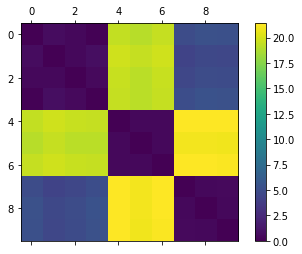

In [27]:
fig = plt.figure()
ax = fig.add_subplot( 111 )

c_ax = ax.matshow( smm, interpolation='none' )
fig.colorbar( c_ax )

plt.show()

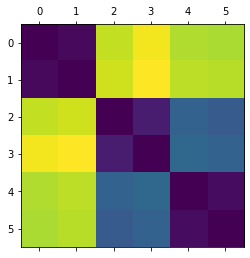

In [9]:
smm_decomp = v @ np.diag( w ) @ np.linalg.inv(v)

plt.matshow( smm_decomp )
plt.show()